In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
biometric_df = pd.read_csv("aadhaar_biometric_merged.csv", low_memory=False)
demographic_df = pd.read_csv("aadhaar_demographic_merged.csv", low_memory=False)
enrolment_df = pd.read_csv("aadhaar_enrolment_merged.csv", low_memory=False)

# Convert date column
biometric_df["date"] = pd.to_datetime(biometric_df["date"], dayfirst=True)
demographic_df["date"] = pd.to_datetime(demographic_df["date"], dayfirst=True)
enrolment_df["date"] = pd.to_datetime(enrolment_df["date"], dayfirst=True)

In [20]:
# Total enrolments
total_enrolment = enrolment_df[["age_0_5", "age_5_17", "age_18_greater"]].sum().sum()

# Total biometric updates
total_biometric = biometric_df[["bio_age_5_17", "bio_age_17_"]].sum().sum()

# Total demographic updates
total_demographic = demographic_df[["demo_age_5_17", "demo_age_17_"]].sum().sum()

total_activity = total_enrolment + total_biometric + total_demographic

percentages = {
    "Enrolment": (total_enrolment / total_activity) * 100,
    "Biometric Updates": (total_biometric / total_activity) * 100,
    "Demographic Updates": (total_demographic / total_activity) * 100
}


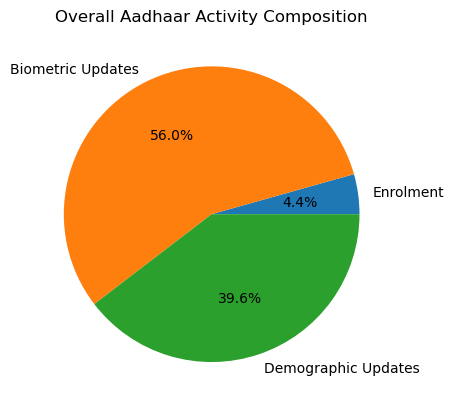

In [21]:
plt.figure()
plt.pie(
    percentages.values(),
    labels=percentages.keys(),
    autopct="%1.1f%%"
)
plt.title("Overall Aadhaar Activity Composition")
plt.show()


<Figure size 640x480 with 0 Axes>

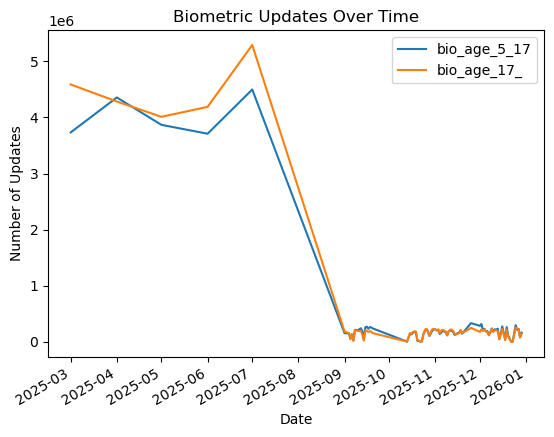

In [3]:
# ------------------ Plot 1: Biometric Updates Trend ------------------
bio_trend = biometric_df.groupby("date")[["bio_age_5_17", "bio_age_17_"]].sum()

plt.figure()
bio_trend.plot()
plt.title("Biometric Updates Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Updates")
plt.show()

<Figure size 640x480 with 0 Axes>

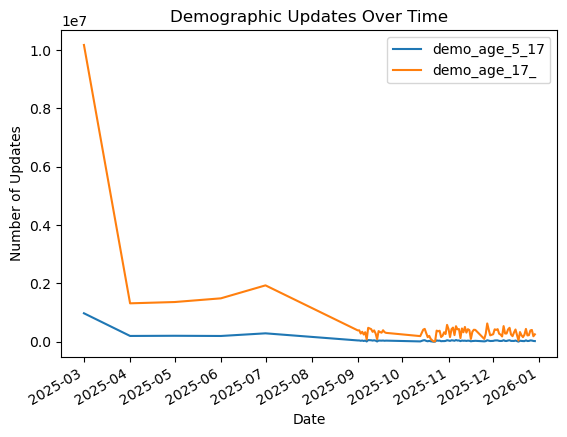

In [4]:
# ------------------ Plot 2: Demographic Updates Trend ------------------
demo_trend = demographic_df.groupby("date")[["demo_age_5_17", "demo_age_17_"]].sum()

plt.figure()
demo_trend.plot()
plt.title("Demographic Updates Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Updates")
plt.show()


<Figure size 640x480 with 0 Axes>

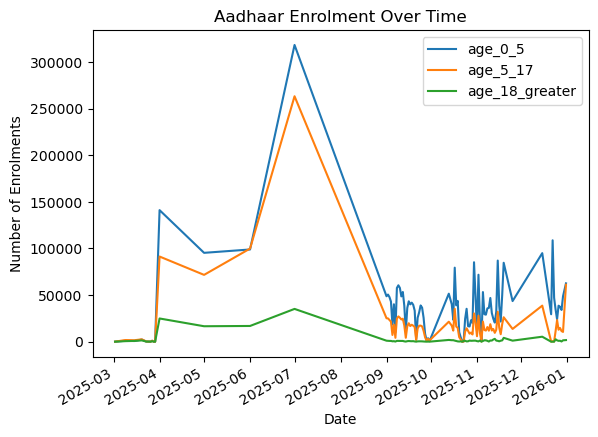

In [5]:
# ------------------ Plot 3: Enrolment Trend ------------------
enrol_trend = enrolment_df.groupby("date")[["age_0_5", "age_5_17", "age_18_greater"]].sum()

plt.figure()
enrol_trend.plot()
plt.title("Aadhaar Enrolment Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Enrolments")
plt.show()

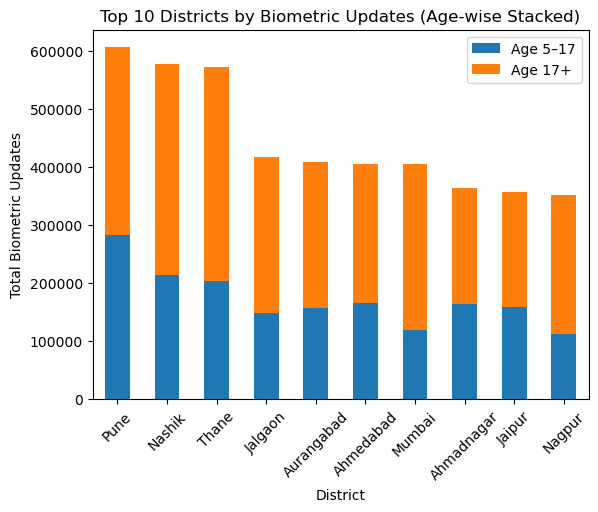

In [6]:
import matplotlib.pyplot as plt

# District-wise sum for both age groups
bio_district = (
    biometric_df
    .groupby("district")[["bio_age_5_17", "bio_age_17_"]]
    .sum()
)

# Select top 10 districts by total updates
bio_district["total"] = bio_district["bio_age_5_17"] + bio_district["bio_age_17_"]
top10 = bio_district.sort_values("total", ascending=False).head(10)

# Drop helper column
top10 = top10.drop(columns="total")

# Plot stacked bar chart (ONE bar per district)
top10.plot(kind="bar", stacked=True)

plt.title("Top 10 Districts by Biometric Updates (Age-wise Stacked)")
plt.xlabel("District")
plt.ylabel("Total Biometric Updates")
plt.xticks(rotation=45)
plt.legend(["Age 5–17", "Age 17+"])
plt.show()


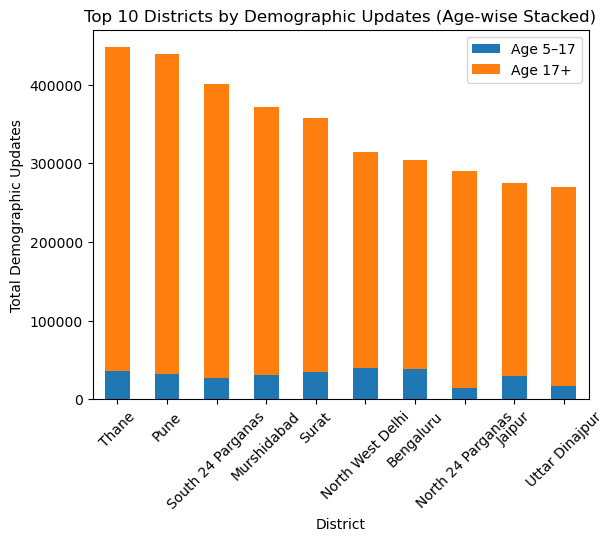

In [7]:
import matplotlib.pyplot as plt

# District-wise sum for both age groups
demo_district = (
    demographic_df
    .groupby("district")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
)

# Select top 10 districts by total updates
demo_district["total"] = demo_district["demo_age_5_17"] + demo_district["demo_age_17_"]
top10_demo = demo_district.sort_values("total", ascending=False).head(10)

# Drop helper column
top10_demo = top10_demo.drop(columns="total")

# Plot stacked bar chart (ONE bar per district)
top10_demo.plot(kind="bar", stacked=True)

plt.title("Top 10 Districts by Demographic Updates (Age-wise Stacked)")
plt.xlabel("District")
plt.ylabel("Total Demographic Updates")
plt.xticks(rotation=45)
plt.legend(["Age 5–17", "Age 17+"])
plt.show()


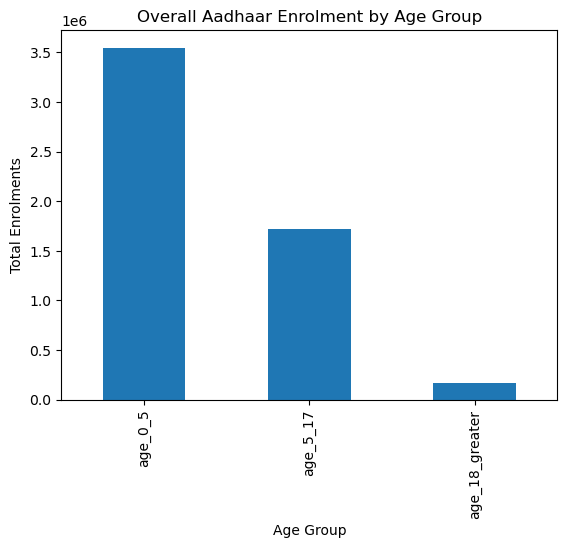

In [8]:
age_totals = enrolment_df[["age_0_5", "age_5_17", "age_18_greater"]].sum()

plt.figure()
age_totals.plot(kind="bar")
plt.title("Overall Aadhaar Enrolment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Enrolments")
plt.show()


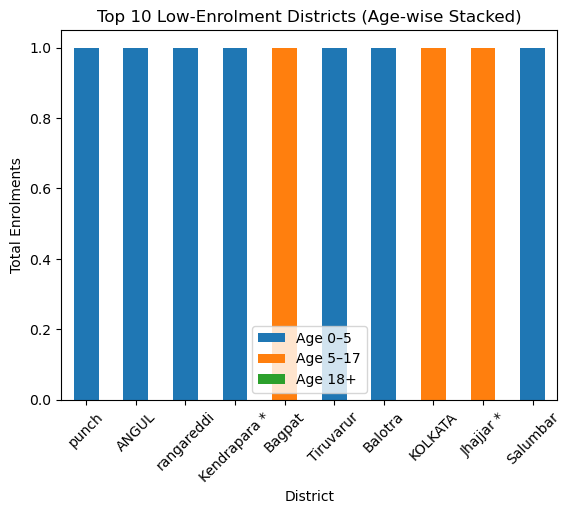

In [9]:
import matplotlib.pyplot as plt

# District-wise enrolment by age groups
enrol_district = (
    enrolment_df
    .groupby("district")[["age_0_5", "age_5_17", "age_18_greater"]]
    .sum()
)

# Total enrolment
enrol_district["total"] = (
    enrol_district["age_0_5"] +
    enrol_district["age_5_17"] +
    enrol_district["age_18_greater"]
)

# Select top 10 LOW enrolment districts
low10 = enrol_district.sort_values("total").head(10)

# Drop helper column
low10 = low10.drop(columns="total")

# Plot stacked bar chart (ONE bar per district)
low10.plot(kind="bar", stacked=True)

plt.title("Top 10 Low-Enrolment Districts (Age-wise Stacked)")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.legend(["Age 0–5", "Age 5–17", "Age 18+"])
plt.show()


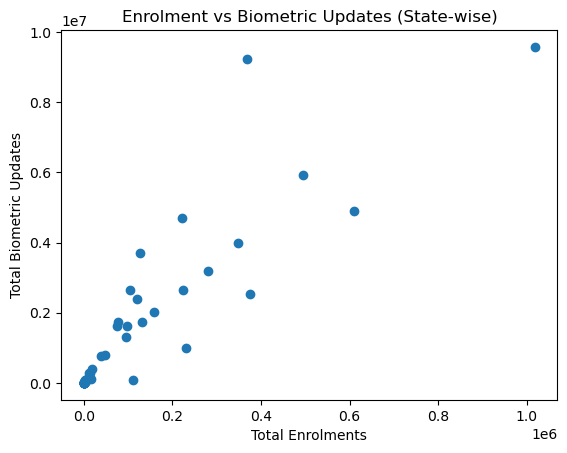

In [10]:
# State-wise totals (separately)
enrol_state = enrolment_df.groupby("state")[["age_0_5","age_5_17","age_18_greater"]].sum()
enrol_state["total_enrolment"] = enrol_state.sum(axis=1)

bio_state = biometric_df.groupby("state")[["bio_age_5_17","bio_age_17_"]].sum()
bio_state["total_bio"] = bio_state.sum(axis=1)

# Align states
common_states = enrol_state.index.intersection(bio_state.index)

plt.figure()
plt.scatter(
    enrol_state.loc[common_states, "total_enrolment"],
    bio_state.loc[common_states, "total_bio"]
)
plt.xlabel("Total Enrolments")
plt.ylabel("Total Biometric Updates")
plt.title("Enrolment vs Biometric Updates (State-wise)")
plt.show()

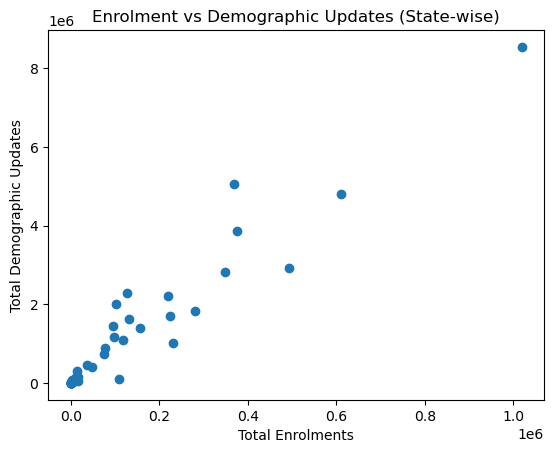

In [11]:
demo_state = demographic_df.groupby("state")[["demo_age_5_17","demo_age_17_"]].sum()
demo_state["total_demo"] = demo_state.sum(axis=1)

common_states = enrol_state.index.intersection(demo_state.index)

plt.figure()
plt.scatter(
    enrol_state.loc[common_states, "total_enrolment"],
    demo_state.loc[common_states, "total_demo"]
)
plt.xlabel("Total Enrolments")
plt.ylabel("Total Demographic Updates")
plt.title("Enrolment vs Demographic Updates (State-wise)")
plt.show()


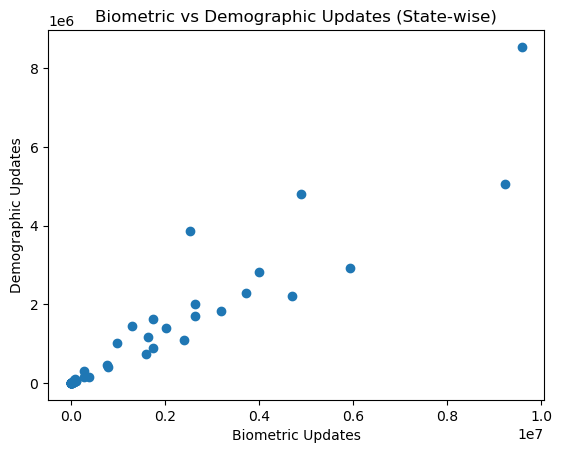

In [12]:
common_states = bio_state.index.intersection(demo_state.index)

plt.figure()
plt.scatter(
    bio_state.loc[common_states, "total_bio"],
    demo_state.loc[common_states, "total_demo"]
)
plt.xlabel("Biometric Updates")
plt.ylabel("Demographic Updates")
plt.title("Biometric vs Demographic Updates (State-wise)")
plt.show()


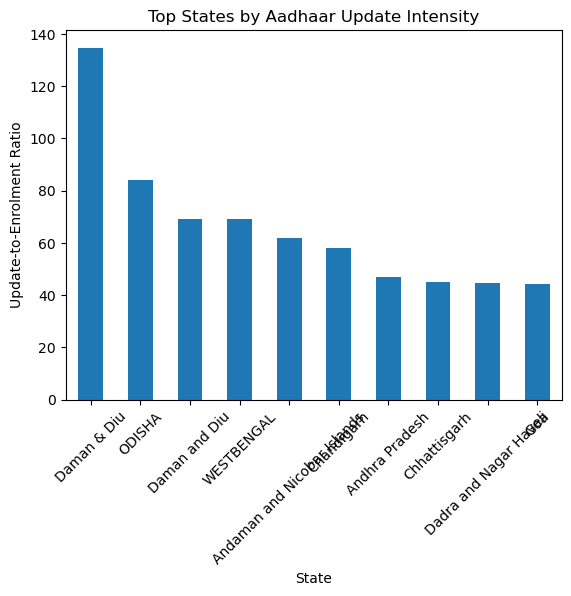

In [13]:
update_intensity = (
    bio_state["total_bio"] + demo_state["total_demo"]
) / enrol_state["total_enrolment"]

update_intensity = update_intensity.dropna().sort_values(ascending=False).head(10)

plt.figure()
update_intensity.plot(kind="bar")
plt.title("Top States by Aadhaar Update Intensity")
plt.xlabel("State")
plt.ylabel("Update-to-Enrolment Ratio")
plt.xticks(rotation=45)
plt.show()



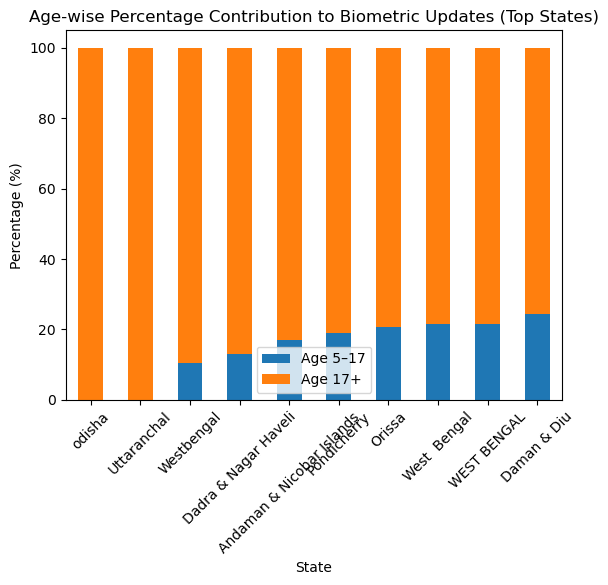

In [14]:
bio_state = biometric_df.groupby("state")[["bio_age_5_17", "bio_age_17_"]].sum()

bio_pct = bio_state.div(bio_state.sum(axis=1), axis=0) * 100
bio_pct = bio_pct.sort_values(by="bio_age_17_", ascending=False).head(10)

bio_pct.plot(kind="bar", stacked=True)
plt.title("Age-wise Percentage Contribution to Biometric Updates (Top States)")
plt.xlabel("State")
plt.ylabel("Percentage (%)")
plt.legend(["Age 5–17", "Age 17+"])
plt.xticks(rotation=45)
plt.show()


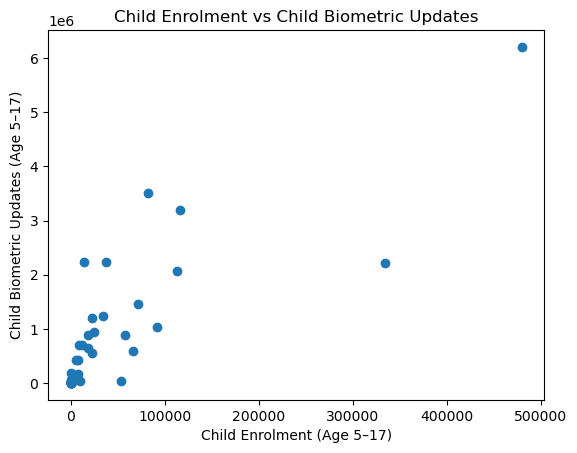

In [15]:
enrol_child = enrolment_df.groupby("state")["age_5_17"].sum()
bio_child = biometric_df.groupby("state")["bio_age_5_17"].sum()

common_states = enrol_child.index.intersection(bio_child.index)

plt.figure()
plt.scatter(
    enrol_child.loc[common_states],
    bio_child.loc[common_states]
)
plt.xlabel("Child Enrolment (Age 5–17)")
plt.ylabel("Child Biometric Updates (Age 5–17)")
plt.title("Child Enrolment vs Child Biometric Updates")
plt.show()


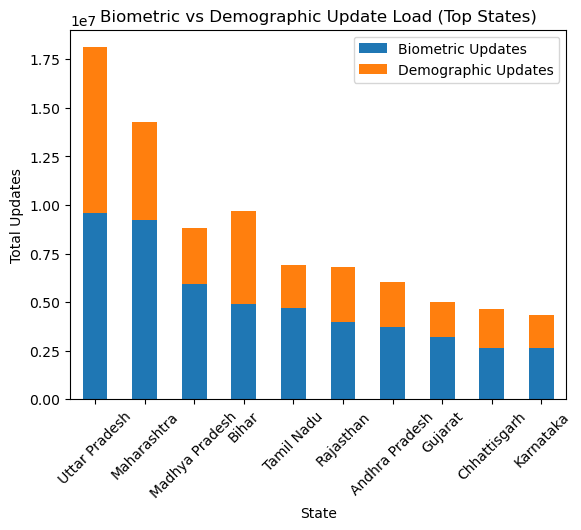

In [16]:
update_composition = pd.DataFrame({
    "Biometric Updates": bio_state.sum(axis=1),
    "Demographic Updates": demographic_df.groupby("state")[["demo_age_5_17","demo_age_17_"]].sum().sum(axis=1)
})

update_composition = update_composition.dropna()
top10 = update_composition.sort_values(by="Biometric Updates", ascending=False).head(10)

top10.plot(kind="bar", stacked=True)
plt.title("Biometric vs Demographic Update Load (Top States)")
plt.xlabel("State")
plt.ylabel("Total Updates")
plt.xticks(rotation=45)
plt.show()
